In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("C:/ClassesMSC/DataSets/DatasetQP.xlsx")
data.head()

,S.No,Reg.No,Attendance,Gender,Working,Hadoop Grade,Programming Interest,Weekly Average Study,Java Knowledge,Python Marks
0,1,2047301,0,Male,Y,D,N,5,Average,59
1,2,2047302,0,Female,Y,D,N,4,Poor,40
2,3,2047303,0,Female,Y,D,N,4,Poor,58
3,4,2047304,1,Female,Y,C,Y,12,Poor,55
4,5,2047305,0,Male,N,C,Y,7,Average,69


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,32.0,1.650000e+01,9.380832,1.0,8.75,16.5,24.25,32.0
Reg.No,32.0,2.047316e+06,9.380832,2047301.0,2047308.75,2047316.5,2047324.25,2047332.0
Attendance,32.0,3.062500e+00,1.740180,0.0,2.00,4.0,4.00,5.0
Weekly Average Study,32.0,1.025000e+01,3.464102,4.0,8.00,10.0,12.00,17.0
Python Marks,32.0,6.971875e+01,8.463334,40.0,68.75,70.0,75.25,82.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   S.No                    32 non-null     int64 
 1   Reg.No                  32 non-null     int64 
 2   Attendance              32 non-null     int64 
 3   Gender                  32 non-null     object
 4   Working                 32 non-null     object
 5   Hadoop Grade            31 non-null     object
 6   Programming Interest    32 non-null     object
 7   Weekly Average Study    32 non-null     int64 
 8   Java Knowledge          31 non-null     object
 9   Python Marks            32 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 2.6+ KB


In [5]:
data.isnull().sum()

S.No                      0
Reg.No                    0
Attendance                0
Gender                    0
Working                   0
Hadoop Grade              1
Programming Interest      0
Weekly Average Study      0
Java Knowledge            1
Python Marks              0
dtype: int64

In [6]:
data = data.dropna(axis = 0)
data.isnull().sum()

S.No                      0
Reg.No                    0
Attendance                0
Gender                    0
Working                   0
Hadoop Grade              0
Programming Interest      0
Weekly Average Study      0
Java Knowledge            0
Python Marks              0
dtype: int64

In [7]:
data.shape

(30, 10)

In [8]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

data['Gender'] = LE.fit_transform(data['Gender'])
data['Working'] = LE.fit_transform(data['Working'])
data['Programming Interest'] = LE.fit_transform(data['Programming Interest'])
data['Java Knowledge'] = LE.fit_transform(data['Java Knowledge'])

data=data.drop(['S.No','Reg.No'], axis=1)
data.head()

,Attendance,Gender,Working,Hadoop Grade,Programming Interest,Weekly Average Study,Java Knowledge,Python Marks
0,0,1,1,D,0,5,0,59
1,0,0,1,D,0,4,3,40
2,0,0,1,D,0,4,3,58
3,1,0,1,C,1,12,3,55
4,0,1,0,C,1,7,0,69


In [9]:
X = data.drop('Hadoop Grade', axis=1)
y = data['Hadoop Grade']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [12]:
pred = model.predict(X_test)
print(pred)

['B' 'B' 'B' 'B' 'C' 'C']


In [13]:
from sklearn.metrics import accuracy_score

print('ACCURACY OF THE MODEL: ',accuracy_score(y_test, pred))

ACCURACY OF THE MODEL:  0.6666666666666666


In [14]:
from sklearn.metrics import confusion_matrix as cm

matrix = cm(y_test,pred)
print(matrix)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 2 0]
 [0 0 0 2]]


In [15]:
from sklearn.metrics import classification_report as cr

report = cr(y_test,pred, zero_division = 1)
print(report)

              precision    recall  f1-score   support

           A       1.00      0.00      0.00         1
          A+       1.00      0.00      0.00         1
           B       0.50      1.00      0.67         2
           C       1.00      1.00      1.00         2

    accuracy                           0.67         6
   macro avg       0.88      0.50      0.42         6
weighted avg       0.83      0.67      0.56         6



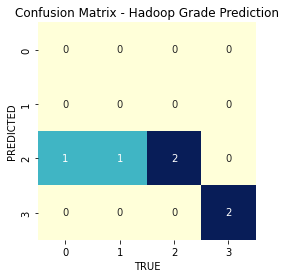

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(matrix.T, square=True, annot=True, fmt='d' , cmap="YlGnBu",  cbar=False)

plt.title('Confusion Matrix - Hadoop Grade Prediction')
plt.xlabel('TRUE')
plt.ylabel('PREDICTED')
plt.show()

In [17]:
new = [{'Attendance': 4, 'Gender': 1, 'Working': 0, 'Programming Interest': 1, 
        'Weekly Average Study': 14, 'Java Knowledge': 1, 'Python Marks': 75}]

new = pd.DataFrame.from_dict(new)
new

,Attendance,Gender,Working,Programming Interest,Weekly Average Study,Java Knowledge,Python Marks
0,4,1,0,1,14,1,75


In [18]:
print('Hadoop Grade of new student: ', model.predict(new))

Hadoop Grade of new student:  ['B']
